In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
font_list = mpl.font_manager.findSystemFonts()
print(font_list)

prop = mpl.font_manager.FontProperties(fname='원하는 폰트 경로')
plt.rcParams['font.family'] = prop.get_family()

font_dir = ['./fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    print(mpl.font_manager.FontProperties(fname=font).get_name())
    mpl.font_manager.fontManager.addfont(font)
    
# Set font family globally
mpl.rcParams['font.family'] = 'Noto Sans KR'
print(mpl.rcParams['font.family'])

['C:\\WINDOWS\\Fonts\\WINGDNG2.TTF', 'C:\\WINDOWS\\Fonts\\constani.ttf', 'C:\\WINDOWS\\Fonts\\HMFMPYUN.TTF', 'C:\\WINDOWS\\Fonts\\LSANSI.TTF', 'C:\\WINDOWS\\Fonts\\H2GTRM.TTF', 'C:\\Windows\\Fonts\\l_10646.ttf', 'C:\\WINDOWS\\Fonts\\ntailu.ttf', 'C:\\Windows\\Fonts\\BSSYM7.TTF', 'C:\\WINDOWS\\Fonts\\seguiemj.ttf', 'C:\\Windows\\Fonts\\Candaraz.ttf', 'C:\\WINDOWS\\Fonts\\tahoma.ttf', 'C:\\Windows\\Fonts\\segoescb.ttf', 'C:\\WINDOWS\\Fonts\\segoeuib.ttf', 'C:\\Windows\\Fonts\\GARABD.TTF', 'C:\\Windows\\Fonts\\JUICE___.TTF', 'C:\\Windows\\Fonts\\BASKVILL.TTF', 'C:\\WINDOWS\\Fonts\\H2GTRE.TTF', 'C:\\WINDOWS\\Fonts\\gulim.ttc', 'C:\\Windows\\Fonts\\HARNGTON.TTF', 'C:\\Windows\\Fonts\\seguibl.ttf', 'C:\\Windows\\Fonts\\ROCKI.TTF', 'C:\\Windows\\Fonts\\phagspa.ttf', 'C:\\Windows\\Fonts\\constanz.ttf', 'C:\\WINDOWS\\Fonts\\trebuc.ttf', 'C:\\WINDOWS\\Fonts\\GILB____.TTF', 'C:\\WINDOWS\\Fonts\\STFANGSO.TTF', 'C:\\WINDOWS\\Fonts\\BOD_BLAR.TTF', 'C:\\Windows\\Fonts\\TEMPSITC.TTF', 'C:\\WINDOWS\\Fo

In [4]:
df=pd.read_csv('서울시 학원 교습소정보.csv', encoding='cp949')
df

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,인당수강료내용,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시
0,동대문구,학원,1000000064,대성회계실무학원,서울특별시 동대문구 왕산로 225,/ 5층2호?5층6호?5층7호 중 일부(B호) (청량리동/ 미주상가),종합(대),NaN,전산회계/컴퓨터(정보처리/통신기기/인터넷/소프트웨어)/,NaN,...,NaN,Y,N,2490,개원,19681227,NaN,NaN,19681227,20230226
1,동대문구,학원,1000000083,국제전자과학학원,서울특별시 동대문구 고산자로36길 3,/ 3층 일부 (제기동/ 경동시장),직업기술,산업기반기술,전자/,전자,...,NaN,Y,N,2571,개원,19680210,NaN,NaN,19680210,20230226
2,동대문구,학원,1000000147,조이앤플레이음악학원,서울특별시 동대문구 이문로 38,/ 3층 301호 (휘경동/ 민족통일빌딩),예능(대),예능(중),음악/,음악,...,NaN,Y,N,2445,개원,19720630,NaN,NaN,19720630,20230226
3,동대문구,학원,1000000151,한독자동차정비학원,서울특별시 동대문구 왕산로 31,/ 2층/3층 (신설동),직업기술,산업기반기술,NaN,자동차,...,NaN,Y,N,130811,개원,19720501,NaN,NaN,19720501,20230226
4,중랑구,학원,1000000293,예맥보습학원,서울특별시 중랑구 동일로151길 30,2층3층 (묵동),입시.검정 및 보습,보통교과,보습/,보습,...,NaN,N,NaN,131852,개원,19881102,NaN,NaN,19881102,20230226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25970,강서구,학원,9959,삼삼공학원,서울특별시 강서구 곰달래로 161,2층 (화곡동),입시.검정 및 보습,보통교과,보습/,보습,...,NaN,Y,N,157876,개원,20050524,NaN,NaN,20050524,20230226
25971,강서구,학원,9966,맑은소리숲음악학원,서울특별시 강서구 화곡로59길 37,2층(화곡동),예능(대),예능(중),음악/,음악,...,NaN,Y,N,157916,개원,20050518,NaN,NaN,20050518,20230226
25972,성북구,교습소,9973,카라얀음악교습소,서울특별시 성북구 정릉로 292,현대홈타운아파트 상가 203호 (정릉동),예능(대),예능(중),피아노 초급1,음악,...,피아노 초급1:120000/ 피아노 초급2:130000/ 피아노 중급1:140000...,N,NaN,136786,개원,20050524,NaN,NaN,20050524,20230226
25973,성북구,교습소,9975,참글터논술교습소,서울특별시 성북구 북악산로 851,/ 3층 307호 (정릉동),입시.검정 및 보습,보통교과,논술기초A,보습?논술,...,논술기초A:99000/ 논술기초B:150000/ 논술중급:200000/ 논술고급:2...,Y,N,2818,개원,20050524,NaN,NaN,20050524,20230226


In [5]:
df1 = df.copy()

In [6]:
df1["분야명"].unique()

array(['종합(대)', '직업기술', '예능(대)', '입시.검정 및 보습', '기타(대)', '국제화', '독서실',
       '인문사회(대)', '기예(대)', '정보', '특수교육(대)'], dtype=object)

In [7]:
df1=df1.loc[~df1["분야명"].isin(['직업기술', '독서실', '인문사회(대)', '특수교육(대)'])] #성인위주 운영 학원 필터링 위해 특정 컬럼에서 특정 키워드를 포함한 행들을 '~'을 사용해서 필터링하고 새로운 데이터프레임으로

idx = df1[df1.분야명.str.contains("직업기술|독서실|특수교육(대)")].index
df1.drop(idx, inplace=True)# 
df1.분야명.value_counts()

In [8]:
df1['도로명상세주소']=df1["도로명상세주소"].str.replace('?', '/', regex=True)#
#series replace 말고 str replace는 전체 다 바꿔줌
df1

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,인당수강료내용,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시
0,동대문구,학원,1000000064,대성회계실무학원,서울특별시 동대문구 왕산로 225,/ 5층2호/5층6호/5층7호 중 일부(B호) (청량리동/ 미주상가),종합(대),NaN,전산회계/컴퓨터(정보처리/통신기기/인터넷/소프트웨어)/,NaN,...,NaN,Y,N,2490,개원,19681227,NaN,NaN,19681227,20230226
2,동대문구,학원,1000000147,조이앤플레이음악학원,서울특별시 동대문구 이문로 38,/ 3층 301호 (휘경동/ 민족통일빌딩),예능(대),예능(중),음악/,음악,...,NaN,Y,N,2445,개원,19720630,NaN,NaN,19720630,20230226
4,중랑구,학원,1000000293,예맥보습학원,서울특별시 중랑구 동일로151길 30,2층3층 (묵동),입시.검정 및 보습,보통교과,보습/,보습,...,NaN,N,NaN,131852,개원,19881102,NaN,NaN,19881102,20230226
5,중랑구,학원,1000000420,세진보습학원,서울특별시 중랑구 공릉로 58,2층4층일부 (묵동),입시.검정 및 보습,보통교과,NaN,보습?논술,...,NaN,N,N,131848,개원,19880719,NaN,NaN,19880719,20230226
6,중랑구,학원,1000000511,금파음악학원,서울특별시 중랑구 동일로101길 52,2층 (면목동),예능(대),예능(중),NaN,음악,...,NaN,Y,N,131823,개원,19880829,NaN,NaN,19880829,20230226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25970,강서구,학원,9959,삼삼공학원,서울특별시 강서구 곰달래로 161,2층 (화곡동),입시.검정 및 보습,보통교과,보습/,보습,...,NaN,Y,N,157876,개원,20050524,NaN,NaN,20050524,20230226
25971,강서구,학원,9966,맑은소리숲음악학원,서울특별시 강서구 화곡로59길 37,2층(화곡동),예능(대),예능(중),음악/,음악,...,NaN,Y,N,157916,개원,20050518,NaN,NaN,20050518,20230226
25972,성북구,교습소,9973,카라얀음악교습소,서울특별시 성북구 정릉로 292,현대홈타운아파트 상가 203호 (정릉동),예능(대),예능(중),피아노 초급1,음악,...,피아노 초급1:120000/ 피아노 초급2:130000/ 피아노 중급1:140000...,N,NaN,136786,개원,20050524,NaN,NaN,20050524,20230226
25973,성북구,교습소,9975,참글터논술교습소,서울특별시 성북구 북악산로 851,/ 3층 307호 (정릉동),입시.검정 및 보습,보통교과,논술기초A,보습?논술,...,논술기초A:99000/ 논술기초B:150000/ 논술중급:200000/ 논술고급:2...,Y,N,2818,개원,20050524,NaN,NaN,20050524,20230226


In [9]:
df1['교습과정목록명']=df1["교습과정목록명"].str.replace('?', '/', regex=True)#series replace 말고 str replace는 전체 다 바꿔줌
df1 #도로명 상세주소에 인코딩 오류인 ?를 /로 원상복구

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,인당수강료내용,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시
0,동대문구,학원,1000000064,대성회계실무학원,서울특별시 동대문구 왕산로 225,/ 5층2호/5층6호/5층7호 중 일부(B호) (청량리동/ 미주상가),종합(대),NaN,전산회계/컴퓨터(정보처리/통신기기/인터넷/소프트웨어)/,NaN,...,NaN,Y,N,2490,개원,19681227,NaN,NaN,19681227,20230226
2,동대문구,학원,1000000147,조이앤플레이음악학원,서울특별시 동대문구 이문로 38,/ 3층 301호 (휘경동/ 민족통일빌딩),예능(대),예능(중),음악/,음악,...,NaN,Y,N,2445,개원,19720630,NaN,NaN,19720630,20230226
4,중랑구,학원,1000000293,예맥보습학원,서울특별시 중랑구 동일로151길 30,2층3층 (묵동),입시.검정 및 보습,보통교과,보습/,보습,...,NaN,N,NaN,131852,개원,19881102,NaN,NaN,19881102,20230226
5,중랑구,학원,1000000420,세진보습학원,서울특별시 중랑구 공릉로 58,2층4층일부 (묵동),입시.검정 및 보습,보통교과,NaN,보습?논술,...,NaN,N,N,131848,개원,19880719,NaN,NaN,19880719,20230226
6,중랑구,학원,1000000511,금파음악학원,서울특별시 중랑구 동일로101길 52,2층 (면목동),예능(대),예능(중),NaN,음악,...,NaN,Y,N,131823,개원,19880829,NaN,NaN,19880829,20230226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25970,강서구,학원,9959,삼삼공학원,서울특별시 강서구 곰달래로 161,2층 (화곡동),입시.검정 및 보습,보통교과,보습/,보습,...,NaN,Y,N,157876,개원,20050524,NaN,NaN,20050524,20230226
25971,강서구,학원,9966,맑은소리숲음악학원,서울특별시 강서구 화곡로59길 37,2층(화곡동),예능(대),예능(중),음악/,음악,...,NaN,Y,N,157916,개원,20050518,NaN,NaN,20050518,20230226
25972,성북구,교습소,9973,카라얀음악교습소,서울특별시 성북구 정릉로 292,현대홈타운아파트 상가 203호 (정릉동),예능(대),예능(중),피아노 초급1,음악,...,피아노 초급1:120000/ 피아노 초급2:130000/ 피아노 중급1:140000...,N,NaN,136786,개원,20050524,NaN,NaN,20050524,20230226
25973,성북구,교습소,9975,참글터논술교습소,서울특별시 성북구 북악산로 851,/ 3층 307호 (정릉동),입시.검정 및 보습,보통교과,논술기초A,보습?논술,...,논술기초A:99000/ 논술기초B:150000/ 논술중급:200000/ 논술고급:2...,Y,N,2818,개원,20050524,NaN,NaN,20050524,20230226


In [10]:
df1['교습과정명']=df1["교습과정명"].str.replace('?', '/', regex=True)#series replace 말고 str replace는 전체 다 바꿔줌
df1

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,도로명상세주소,분야명,교습계열명,교습과정목록명,교습과정명,...,인당수강료내용,수강료공개여부,기숙사학원여부,도로명우편번호,등록상태명,등록일자,휴원시작일자,휴원종료일자,개설일자,적재일시
0,동대문구,학원,1000000064,대성회계실무학원,서울특별시 동대문구 왕산로 225,/ 5층2호/5층6호/5층7호 중 일부(B호) (청량리동/ 미주상가),종합(대),NaN,전산회계/컴퓨터(정보처리/통신기기/인터넷/소프트웨어)/,NaN,...,NaN,Y,N,2490,개원,19681227,NaN,NaN,19681227,20230226
2,동대문구,학원,1000000147,조이앤플레이음악학원,서울특별시 동대문구 이문로 38,/ 3층 301호 (휘경동/ 민족통일빌딩),예능(대),예능(중),음악/,음악,...,NaN,Y,N,2445,개원,19720630,NaN,NaN,19720630,20230226
4,중랑구,학원,1000000293,예맥보습학원,서울특별시 중랑구 동일로151길 30,2층3층 (묵동),입시.검정 및 보습,보통교과,보습/,보습,...,NaN,N,NaN,131852,개원,19881102,NaN,NaN,19881102,20230226
5,중랑구,학원,1000000420,세진보습학원,서울특별시 중랑구 공릉로 58,2층4층일부 (묵동),입시.검정 및 보습,보통교과,NaN,보습/논술,...,NaN,N,N,131848,개원,19880719,NaN,NaN,19880719,20230226
6,중랑구,학원,1000000511,금파음악학원,서울특별시 중랑구 동일로101길 52,2층 (면목동),예능(대),예능(중),NaN,음악,...,NaN,Y,N,131823,개원,19880829,NaN,NaN,19880829,20230226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25970,강서구,학원,9959,삼삼공학원,서울특별시 강서구 곰달래로 161,2층 (화곡동),입시.검정 및 보습,보통교과,보습/,보습,...,NaN,Y,N,157876,개원,20050524,NaN,NaN,20050524,20230226
25971,강서구,학원,9966,맑은소리숲음악학원,서울특별시 강서구 화곡로59길 37,2층(화곡동),예능(대),예능(중),음악/,음악,...,NaN,Y,N,157916,개원,20050518,NaN,NaN,20050518,20230226
25972,성북구,교습소,9973,카라얀음악교습소,서울특별시 성북구 정릉로 292,현대홈타운아파트 상가 203호 (정릉동),예능(대),예능(중),피아노 초급1,음악,...,피아노 초급1:120000/ 피아노 초급2:130000/ 피아노 중급1:140000...,N,NaN,136786,개원,20050524,NaN,NaN,20050524,20230226
25973,성북구,교습소,9975,참글터논술교습소,서울특별시 성북구 북악산로 851,/ 3층 307호 (정릉동),입시.검정 및 보습,보통교과,논술기초A,보습/논술,...,논술기초A:99000/ 논술기초B:150000/ 논술중급:200000/ 논술고급:2...,Y,N,2818,개원,20050524,NaN,NaN,20050524,20230226


In [11]:
df1.분야명.value_counts()

입시.검정 및 보습    13906
예능(대)          6926
국제화            1265
기타(대)           810
기예(대)           705
종합(대)           511
정보               19
Name: 분야명, dtype: int64

In [12]:
df1.columns

Index(['행정구역명', '학원/교습소', '학원지정번호', '학원명', '도로명주소', '도로명상세주소', '분야명', '교습계열명',
       '교습과정목록명', '교습과정명', '정원합계', '일시수용능력인원합계', '인당수강료내용', '수강료공개여부',
       '기숙사학원여부', '도로명우편번호', '등록상태명', '등록일자', '휴원시작일자', '휴원종료일자', '개설일자',
       '적재일시'],
      dtype='object')

In [13]:
df1=df1.drop(columns = ['인당수강료내용', '수강료공개여부','기숙사학원여부', '등록상태명', '등록일자', '개설일자', '적재일시', '휴원시작일자', '휴원종료일자', '일시수용능력인원합계', '정원합계', '도로명상세주소', '교습과정목록명'])  #여러개 열을 삭제할 때
#분석에 필요하지 않은 열 삭제

In [14]:
df1=df1.sort_values(by='행정구역명')
df1

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,분야명,교습계열명,교습과정명,도로명우편번호
4923,강남구,학원,23388,페트라영어학원,서울특별시 강남구 도곡로 409,입시.검정 및 보습,보통교과,보습,135998
6976,강남구,학원,3000011256,대오학원,서울특별시 강남구 역삼로 456-2,입시.검정 및 보습,보통교과,보습/논술,135997
23351,강남구,학원,3000042314,대치지엠학원,서울특별시 강남구 도곡로 331,입시.검정 및 보습,보통교과,보습/논술,6218
6973,강남구,학원,3000011246,아이비라인압구정학원,서울특별시 강남구 선릉로153길 5,입시.검정 및 보습,진학지도,진학상담지도,6019
6972,강남구,학원,3000011244,해빛나인어학원2관학원,서울특별시 강남구 도곡로 517,국제화,외국어,실용외국어(유아/초/중/고),135849
...,...,...,...,...,...,...,...,...,...
22914,NaN,교습소,3000041849,빨간펜수학의달인문정훼밀리수학교습소,서울특별시 송파구 중대로 24,입시.검정 및 보습,보통교과,보습,5834
23416,NaN,학원,3000042387,피이브(fiive)원격학원,서울특별시 마포구 독막로 92,입시.검정 및 보습,보통교과,보습/논술,4075
23417,NaN,학원,3000042388,피드무용학원,서울특별시 마포구 와우산로 122,예능(대),예능(중),무용,4059
24086,NaN,학원,3000043082,뮤즈벨리댄스학원,서울특별시 구로구 중앙로6길 40,예능(대),예능(중),무용,8223


In [15]:
df1.columns

Index(['행정구역명', '학원/교습소', '학원지정번호', '학원명', '도로명주소', '분야명', '교습계열명', '교습과정명',
       '도로명우편번호'],
      dtype='object')

In [16]:
df1.loc[df1['행정구역명'].isna(), '행정구역명'] = df1['도로명주소'].str.split().str[1] #행정구역명이 결측값인건 도로명 주소에 기재된 자치구를 인덱싱으로 갖고옴
#df1.행정구역명.isna().sum()

In [17]:
#df1['도로명주소'].str.split().str[1]

In [18]:
df1["행정구역명"].isna().sum()

0

In [19]:
df1.columns

Index(['행정구역명', '학원/교습소', '학원지정번호', '학원명', '도로명주소', '분야명', '교습계열명', '교습과정명',
       '도로명우편번호'],
      dtype='object')

In [20]:
#도로명주소 (날림)
#도로명상세주소
#분야명
#교습계열명
#교습과정목록명
#교습과정명

In [21]:
df1.isna().sum()

행정구역명        0
학원/교습소       0
학원지정번호       0
학원명          0
도로명주소       10
분야명          0
교습계열명      510
교습과정명      508
도로명우편번호      0
dtype: int64

In [22]:
df1['도로명주소'].isnull().sum()

10

In [23]:
df1.dropna(subset=['도로명주소'], inplace=True) #도로명 주소 칼럼 삭제

In [24]:
#df1.도로명상세주소.isna().sum()

In [25]:
#df1[df1.도로명상세주소.isna()]

In [26]:
df1=df1.loc[~df1["교습과정명"].isin(['공예(종이접기/꽃꽂이/꽃기예)', '바둑', '통역(성인)', '꽃꽂이', '번역(성인)', '광업자원', '국악', '회계', '기계', '국토개발', '어학(성인)', '경리', '회계'])] 
#해당 키워드가 들어간 교습과정명 행은 삭제

In [27]:
df1

,행정구역명,학원/교습소,학원지정번호,학원명,도로명주소,분야명,교습계열명,교습과정명,도로명우편번호
4923,강남구,학원,23388,페트라영어학원,서울특별시 강남구 도곡로 409,입시.검정 및 보습,보통교과,보습,135998
6976,강남구,학원,3000011256,대오학원,서울특별시 강남구 역삼로 456-2,입시.검정 및 보습,보통교과,보습/논술,135997
23351,강남구,학원,3000042314,대치지엠학원,서울특별시 강남구 도곡로 331,입시.검정 및 보습,보통교과,보습/논술,6218
6973,강남구,학원,3000011246,아이비라인압구정학원,서울특별시 강남구 선릉로153길 5,입시.검정 및 보습,진학지도,진학상담지도,6019
6972,강남구,학원,3000011244,해빛나인어학원2관학원,서울특별시 강남구 도곡로 517,국제화,외국어,실용외국어(유아/초/중/고),135849
...,...,...,...,...,...,...,...,...,...
22914,송파구,교습소,3000041849,빨간펜수학의달인문정훼밀리수학교습소,서울특별시 송파구 중대로 24,입시.검정 및 보습,보통교과,보습,5834
23416,마포구,학원,3000042387,피이브(fiive)원격학원,서울특별시 마포구 독막로 92,입시.검정 및 보습,보통교과,보습/논술,4075
23417,마포구,학원,3000042388,피드무용학원,서울특별시 마포구 와우산로 122,예능(대),예능(중),무용,4059
24086,구로구,학원,3000043082,뮤즈벨리댄스학원,서울특별시 구로구 중앙로6길 40,예능(대),예능(중),무용,8223


In [28]:
df2=df1.copy()

In [29]:
df2.isnull().sum()

행정구역명        0
학원/교습소       0
학원지정번호       0
학원명          0
도로명주소        0
분야명          0
교습계열명      509
교습과정명      508
도로명우편번호      0
dtype: int64

In [30]:
df2.교습계열명.fillna('Unknown', inplace=True) 
df2.교습과정명.fillna('Unknown', inplace=True) 
#교습계열/계정명 칼럼에 대해 결측값을 Unknown 문자열로 대체

In [31]:
df2.isnull().sum()

행정구역명      0
학원/교습소     0
학원지정번호     0
학원명        0
도로명주소      0
분야명        0
교습계열명      0
교습과정명      0
도로명우편번호    0
dtype: int64

<AxesSubplot:>

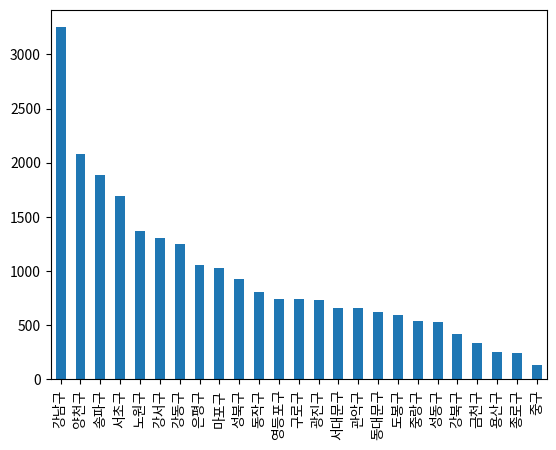

In [32]:
df2.행정구역명.value_counts().plot(kind='bar') #행정구역별로 학원의 개수에 대해 시각화

In [33]:
data = df2.행정구역명.value_counts()

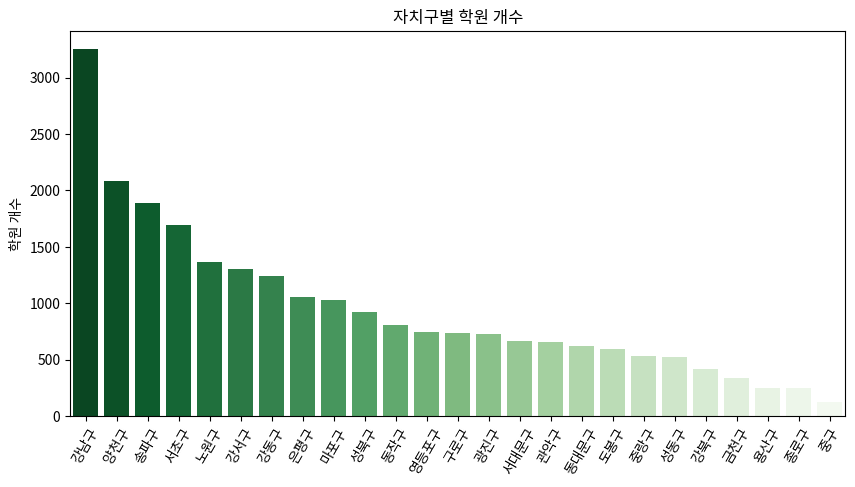

In [40]:
plt.figure(figsize=(10, 5))
plt.ylabel('학원 개수')
plt.title('자치구별 학원 개수')
sns.barplot(x=data.index, y=data.values, palette='Greens_r')
plt.xticks(rotation=60)
plt.show()



In [36]:
data=data.to_frame().reset_index()

In [37]:
data

,index,행정구역명
0,강남구,3250
1,양천구,2082
2,송파구,1890
3,서초구,1691
4,노원구,1369
5,강서구,1307
6,강동구,1246
7,은평구,1052
8,마포구,1031
9,성북구,924


In [38]:
data=data.rename(columns={'행정구역명':'count'})

In [39]:
data=data.rename(columns={'index':'행정구역명'})

In [62]:
data.to_csv('행정구역별 학원개수.csv', index=False, encoding='cp949')

In [64]:
pd.read_csv('행정구역별 학원개수.csv', encoding='cp949')

,행정구역명,count
0,강남구,3250
1,양천구,2082
2,송파구,1890
3,서초구,1691
4,노원구,1369
5,강서구,1307
6,강동구,1246
7,은평구,1052
8,마포구,1031
9,성북구,924
